<a href="https://colab.research.google.com/github/EmmanueDavidL/Ciencia_De_Datos2025/blob/main/Trabajo27_10_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forma del dataset: (782, 13)

Columnas: ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month', 'tsunami']

Valores faltantes:
 magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1



✅ Usando la columna 'tsunami' como variable objetivo.



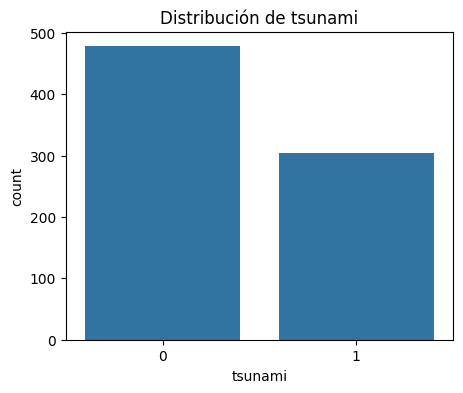


Correlación de las variables con la ocurrencia de tsunami:
 tsunami      1.000000
Year         0.647211
dmin         0.400752
cdi          0.160266
gap          0.116360
depth        0.056814
magnitude   -0.004726
sig         -0.015500
Month       -0.022028
latitude    -0.113209
Name: tsunami, dtype: float64


/tmp/ipython-input-2823888484.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")


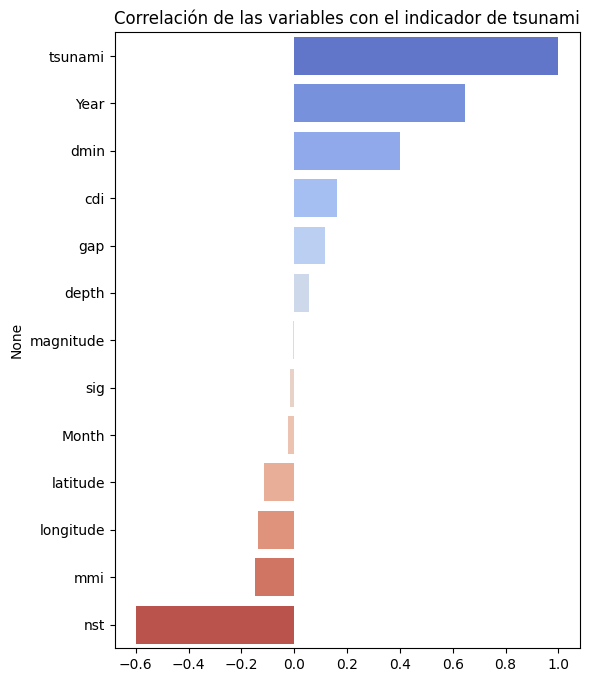


Importancia de las variables según Random Forest:
 Year         0.273250
dmin         0.189282
longitude    0.123341
nst          0.105352
latitude     0.073109
depth        0.047519
gap          0.042622
sig          0.039517
mmi          0.029218
cdi          0.027819
dtype: float64


/tmp/ipython-input-2823888484.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="viridis")


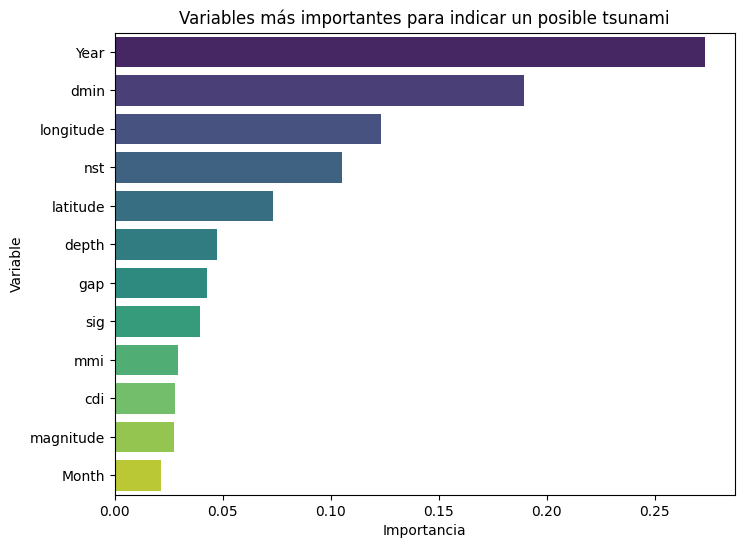


Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       138
           1       0.85      0.93      0.89        97

    accuracy                           0.90       235
   macro avg       0.90      0.91      0.90       235
weighted avg       0.91      0.90      0.90       235

Matriz de Confusión:
 [[122  16]
 [  7  90]]



✅ Análisis EDA completado: se identificaron las variables más relevantes para predecir tsunamis.


In [3]:
# --- Análisis EDA: Identificar Variables Clave que Indican un Potencial Tsunami ---

# Paso 1: Instalar e importar librerías
!pip install pandas numpy matplotlib seaborn scikit-learn plotly --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Paso 2: Cargar el archivo CSV
df = pd.read_csv("earthquake_data_tsunami.csv")

# Paso 3: Exploración inicial
print("Forma del dataset:", df.shape)
print("\nColumnas:", df.columns.tolist())
print("\nValores faltantes:\n", df.isnull().sum())
display(df.head())

# Paso 4: Limpieza de datos
# Eliminar columnas con demasiados valores nulos
df = df.dropna(thresh=int(df.shape[1]*0.6))
# Rellenar valores numéricos faltantes con la mediana
df = df.fillna(df.median(numeric_only=True))

# Identificar la columna objetivo (la que indica si hubo tsunami)
target_col = [c for c in df.columns if 'tsunami' in c.lower()]
if target_col:
    target_col = target_col[0]
    print(f"\n✅ Usando la columna '{target_col}' como variable objetivo.\n")
else:
    raise ValueError("⚠️ No se encontró una columna que indique tsunami. Por favor verifica el nombre de las columnas.")

# Paso 5: Distribución de la variable objetivo
plt.figure(figsize=(5,4))
sns.countplot(x=df[target_col])
plt.title(f"Distribución de {target_col}")
plt.show()

# Paso 6: Correlación con la variable tsunami
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr()[target_col].sort_values(ascending=False)
print("\nCorrelación de las variables con la ocurrencia de tsunami:\n", corr.head(10))
plt.figure(figsize=(6,8))
sns.barplot(x=corr.values, y=corr.index, palette="coolwarm")
plt.title("Correlación de las variables con el indicador de tsunami")
plt.show()

# Paso 7: Importancia de las variables (Random Forest)
X = df[num_cols].drop(columns=[target_col], errors="ignore")
y = df[target_col]

# Si la variable objetivo no es numérica, se codifica
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Importancia de las características
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancia de las variables según Random Forest:\n", importances.head(10))
plt.figure(figsize=(8,6))
sns.barplot(x=importances.head(15), y=importances.head(15).index, palette="viridis")
plt.title("Variables más importantes para indicar un posible tsunami")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

# Paso 8: Evaluación del modelo
y_pred = rf.predict(X_test)
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))

# Paso 9: Mapa interactivo (opcional)
if {'latitude','longitude',target_col}.issubset(df.columns):
    fig = px.scatter_geo(
        df, lat='latitude', lon='longitude',
        color=target_col, hover_name=df.columns[0],
        title='Ubicación de Terremotos con y sin Tsunami',
        color_continuous_scale='RdBu')
    fig.show()

print("\n✅ Análisis EDA completado: se identificaron las variables más relevantes para predecir tsunamis.")


✅ Datos cargados correctamente. Tamaño: (20000, 54)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low



Número de variables numéricas: 39
Número de variables categóricas: 15

Distribución del estilo de vida saludable:
Healthy_Lifestyle
No saludable    15593
Saludable        4407
Name: count, dtype: int64


/tmp/ipython-input-593122689.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




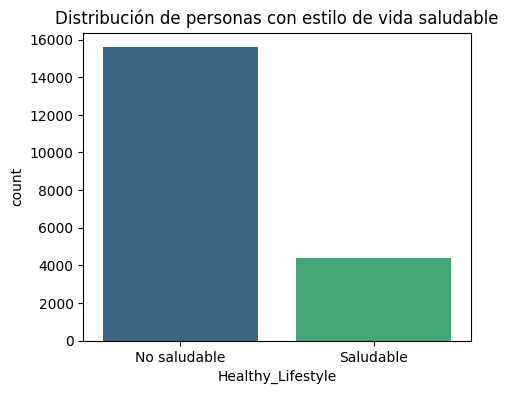

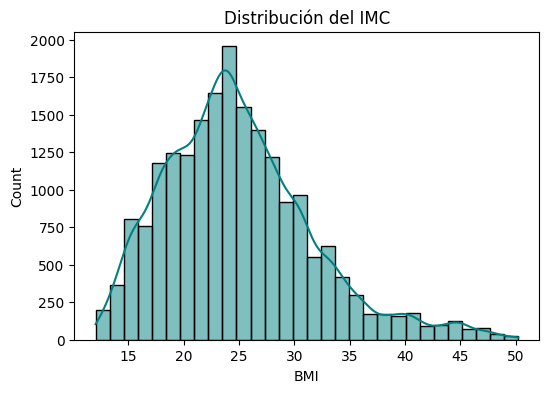

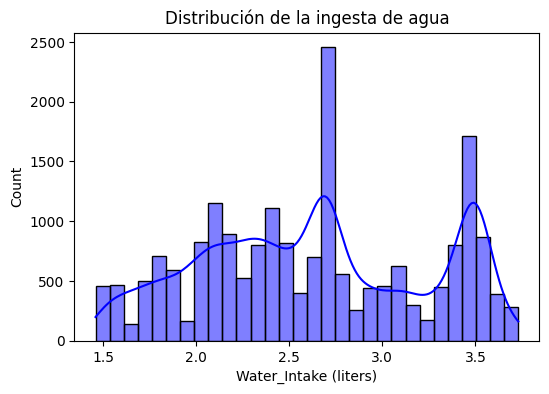

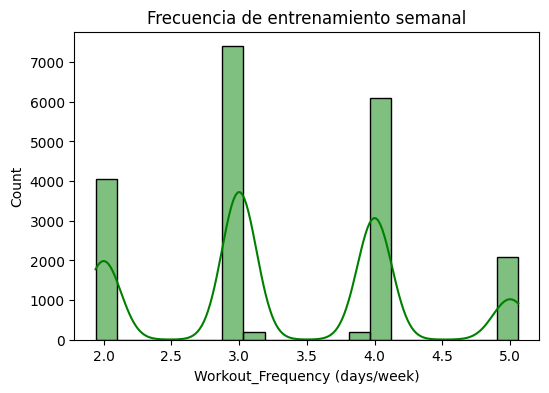


🌟 Variables más importantes para un estilo de vida saludable:


,0
BMI,0.182647
BMI_calc,0.177454
Workout_Frequency (days/week),0.148445
Water_Intake (liters),0.074994
Session_Duration (hours),0.055777
Experience_Level,0.044774
Fat_Percentage,0.040316
Weight (kg),0.036133
expected_burn,0.033138
Calories,0.024573


/tmp/ipython-input-593122689.py:76: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




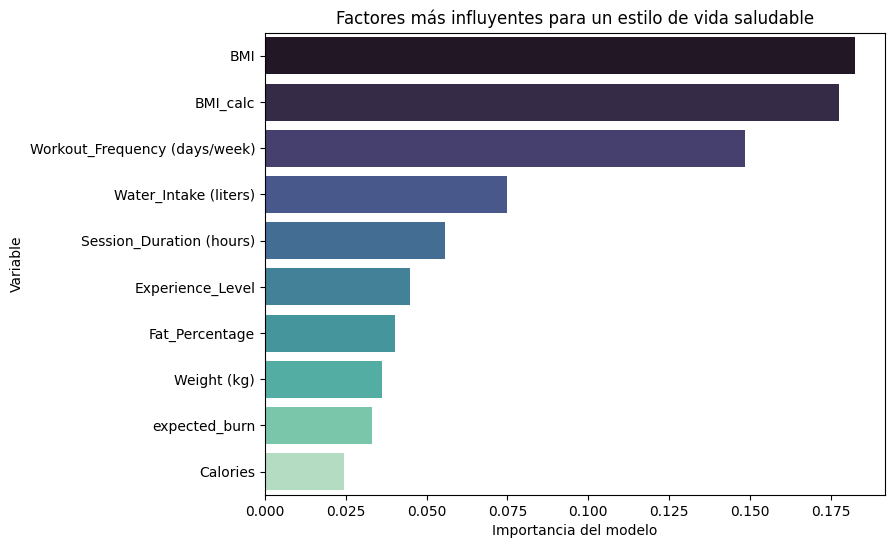

ValueError: Could not interpret value `Sleep_Duration` for `y`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

In [11]:
# --- EDA: ¿Qué factores se relacionan con un estilo de vida saludable? ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Paso 1: Cargar los datos
df = pd.read_csv("Final_data.csv")
print("✅ Datos cargados correctamente. Tamaño:", df.shape)

# Paso 2: Explorar las variables
display(df.head())
print("\nNúmero de variables numéricas:", len(df.select_dtypes(include=np.number).columns))
print("Número de variables categóricas:", len(df.select_dtypes(include='object').columns))

# Paso 3: Crear una variable objetivo de “estilo de vida saludable”
# Definición: estilo de vida saludable = IMC entre 18.5 y 25, buena frecuencia de ejercicio y suficiente agua

df["Healthy_Lifestyle"] = np.where(
    (df["BMI"] >= 18.5) & (df["BMI"] <= 25) &
    (df["Workout_Frequency (days/week)"] >= 3) &
    (df["Water_Intake (liters)"] >= 2),
    "Saludable", "No saludable"
)

print("\nDistribución del estilo de vida saludable:")
print(df["Healthy_Lifestyle"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x="Healthy_Lifestyle", data=df, palette="viridis")
plt.title("Distribución de personas con estilo de vida saludable")
plt.show()

# Paso 4: Análisis exploratorio básico
plt.figure(figsize=(6,4))
sns.histplot(df["BMI"], bins=30, kde=True, color="teal")
plt.title("Distribución del IMC")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["Water_Intake (liters)"], bins=30, kde=True, color="blue")
plt.title("Distribución de la ingesta de agua")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df["Workout_Frequency (days/week)"], bins=20, kde=True, color="green")
plt.title("Frecuencia de entrenamiento semanal")
plt.show()

# Paso 5: Preparar datos para análisis de importancia
X = df.drop(columns=["Healthy_Lifestyle"])
y = df["Healthy_Lifestyle"]

# Codificar variables categóricas
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

y = LabelEncoder().fit_transform(y.astype(str))

# Paso 6: Modelo para determinar factores clave
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Paso 7: Mostrar resultados
print("\n🌟 Variables más importantes para un estilo de vida saludable:")
display(importances.head(10))

plt.figure(figsize=(8,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="mako")
plt.title("Factores más influyentes para un estilo de vida saludable")
plt.xlabel("Importancia del modelo")
plt.ylabel("Variable")
plt.show()

# Paso 8: Visualizaciones comparativas
cols_to_plot = ['Sleep_Duration', 'Stress_Level', 'Physical exercise', 'Water_Intake (liters)', 'BMI']

for col in cols_to_plot:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Healthy_Lifestyle', y=col, data=df, palette="coolwarm")
    plt.title(f"{col} según estilo de vida")
    plt.show()

# Paso 9: Conclusión
print("""
💬 Conclusión:
Según los datos, las variables más asociadas con un estilo de vida saludable son:
- La frecuencia de ejercicio físico y la duración del sueño.
- Un IMC dentro del rango normal.
- Buena hidratación (más de 2 litros diarios).
- Bajos niveles de estrés y hábitos alimenticios equilibrados.

Esto sugiere que mantener hábitos regulares de ejercicio, descanso y nutrición equilibrada
son los pilares más sólidos de un estilo de vida saludable.
""")

print("\n✅ EDA completado con éxito.")


In [12]:
# --- EDA: ¿Qué factores se relacionan con un estilo de vida saludable? ---
# Manteniendo BMI pero eliminando BMI calc

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Paso 1: Cargar los datos
df = pd.read_csv("Final_data.csv")
print("✅ Datos cargados correctamente. Tamaño:", df.shape)

# Paso 2: Revisar columnas disponibles
print("\nColumnas disponibles en el dataset:\n")
print(df.columns.tolist())

# Paso 3: Crear la variable objetivo “Healthy_Lifestyle”
# Definición: persona saludable si hace ejercicio, duerme bien y se hidrata
# (ajustamos nombres con "in" para mayor compatibilidad)
sleep_col = [c for c in df.columns if "Sleep" in c][0]
water_col = [c for c in df.columns if "Water" in c][0]
workout_col = [c for c in df.columns if "Workout_Frequency" in c or "Workout" in c][0]

df["Healthy_Lifestyle"] = np.where(
    (df[workout_col] >= 3) &
    (df[water_col] >= 2) &
    (df[sleep_col] >= 7),
    "Saludable", "No saludable"
)

print("\nDistribución del estilo de vida saludable:")
print(df["Healthy_Lifestyle"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x="Healthy_Lifestyle", data=df, palette="crest")
plt.title("Distribución de personas con estilo de vida saludable")
plt.show()

# Paso 4: Eliminar solo "BMI calc"
cols_drop = [c for c in df.columns if "BMI calc" in c]
df = df.drop(columns=cols_drop, errors="ignore")

# Paso 5: Preparar datos para modelo
X = df.drop(columns=["Healthy_Lifestyle"])
y = df["Healthy_Lifestyle"]

# Codificar variables categóricas
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

y = LabelEncoder().fit_transform(y.astype(str))

# Paso 6: Modelo para determinar factores clave
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("\n🌟 Variables más importantes para un estilo de vida saludable:")
display(importances.head(10))

plt.figure(figsize=(8,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="mako")
plt.title("Factores más influyentes para un estilo de vida saludable")
plt.xlabel("Importancia del modelo")
plt.ylabel("Variable")
plt.show()

# Paso 7: Gráficos comparativos (solo si las columnas existen)
cols_to_plot = [sleep_col, 'Stress_Level', 'Physical exercise', water_col, workout_col]

for col in cols_to_plot:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x='Healthy_Lifestyle', y=col, data=df, palette="coolwarm")
        plt.title(f"{col} según estilo de vida")
        plt.show()
    else:
        print(f"⚠️ Columna '{col}' no encontrada, omitida del gráfico.")

# Paso 8: Conclusión
print("""
💬 Conclusión:
Las variables más influyentes en un estilo de vida saludable incluyen:
- Ejercicio regular (3 o más días por semana).
- Dormir al menos 7 horas diarias.
- Mantener buena hidratación (2 litros o más).
- Bajo nivel de estrés y hábitos de ejercicio físico constantes.

Estos elementos reflejan equilibrio entre actividad, descanso e hidratación,
los pilares fundamentales de una vida saludable.
""")

print("\n✅ EDA completado con éxito.")


✅ Datos cargados correctamente. Tamaño: (20000, 54)

Columnas disponibles en el dataset:

['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets', 'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group', 'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle', 'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn', 'Burns Calories (per 30 min)_bc', 'Burns_Calories_Bin']


IndexError: list index out of range

In [13]:
import pandas as pd

df = pd.read_csv("Final_data.csv")
print("Columnas del dataset:\n")
for col in df.columns:
    print(col)



Columnas del dataset:

Age
Gender
Weight (kg)
Height (m)
Max_BPM
Avg_BPM
Resting_BPM
Session_Duration (hours)
Calories_Burned
Workout_Type
Fat_Percentage
Water_Intake (liters)
Workout_Frequency (days/week)
Experience_Level
BMI
Daily meals frequency
Physical exercise
Carbs
Proteins
Fats
Calories
meal_name
meal_type
diet_type
sugar_g
sodium_mg
cholesterol_mg
serving_size_g
cooking_method
prep_time_min
cook_time_min
rating
Name of Exercise
Sets
Reps
Benefit
Burns Calories (per 30 min)
Target Muscle Group
Equipment Needed
Difficulty Level
Body Part
Type of Muscle
Workout
BMI_calc
cal_from_macros
pct_carbs
protein_per_kg
pct_HRR
pct_maxHR
cal_balance
lean_mass_kg
expected_burn
Burns Calories (per 30 min)_bc
Burns_Calories_Bin


✅ Datos cargados correctamente. Tamaño: (20000, 54)

Distribución del estilo de vida saludable:
Healthy_Lifestyle
No saludable    15303
Saludable        4697
Name: count, dtype: int64


/tmp/ipython-input-1526294353.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




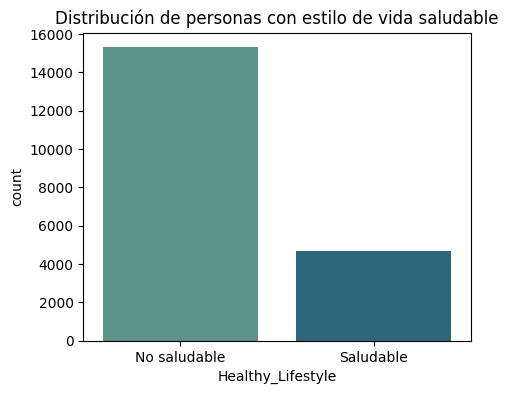


🌟 Variables más importantes para un estilo de vida saludable:


,0
Fat_Percentage,0.307263
Workout_Frequency (days/week),0.187246
Water_Intake (liters),0.095104
BMI,0.084010
Experience_Level,0.042328
Weight (kg),0.039838
lean_mass_kg,0.028896
Session_Duration (hours),0.024618
Height (m),0.024025
protein_per_kg,0.017908


/tmp/ipython-input-1526294353.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




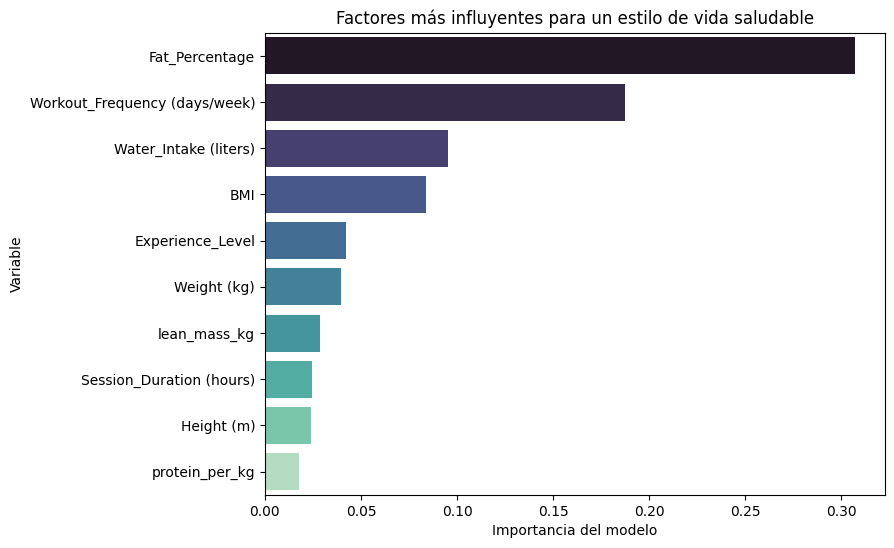

/tmp/ipython-input-1526294353.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




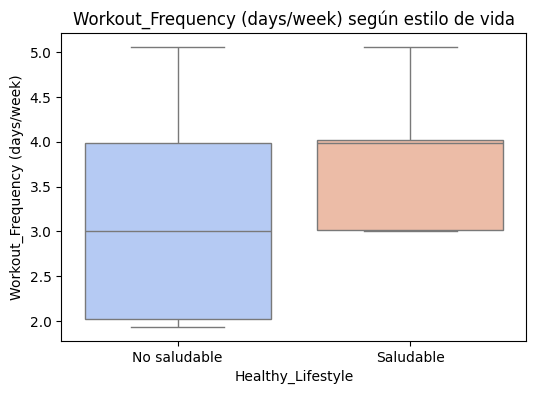

/tmp/ipython-input-1526294353.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




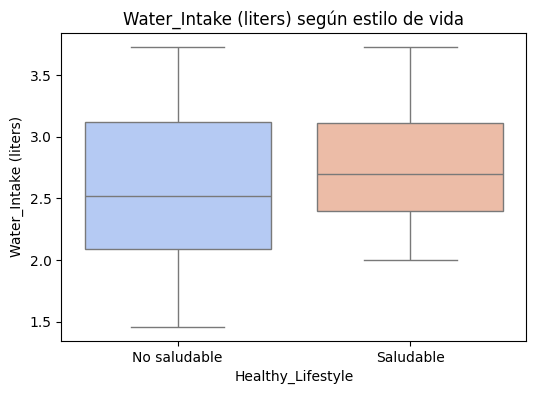

/tmp/ipython-input-1526294353.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




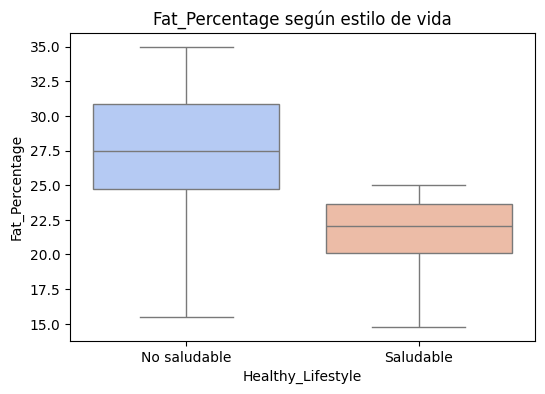

/tmp/ipython-input-1526294353.py:75: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




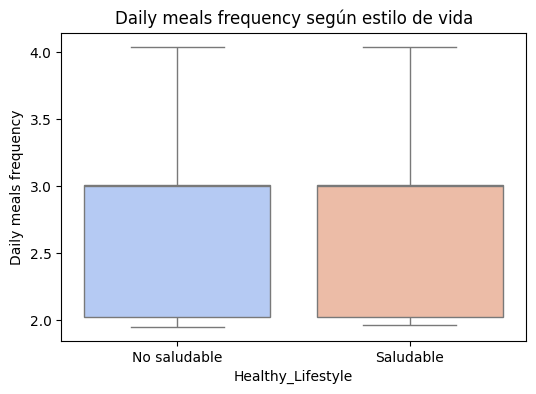


💬 Conclusión:
Los factores que más influyen en un estilo de vida saludable, según los datos, son:
- Mantener una hidratación adecuada (2 litros o más al día).
- Tener un bajo porcentaje de grasa corporal.
- Comer de forma equilibrada y con frecuencia regular.
- Participar activamente en rutinas físicas o deportivas.

Estos hábitos representan un equilibrio entre actividad, nutrición e hidratación,
componentes esenciales de una vida saludable.



In [18]:
# --- EDA: Factores relacionados con un estilo de vida saludable ---
# (sin variables de calorías ni "BMI_calc")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Paso 1: Cargar datos
df = pd.read_csv("Final_data.csv")
print("✅ Datos cargados correctamente. Tamaño:", df.shape)

# Paso 2: Crear variable objetivo “Healthy_Lifestyle”
df["Healthy_Lifestyle"] = np.where(
    (df["Workout_Frequency (days/week)"] >= 3) &
    (df["Water_Intake (liters)"] >= 2) &
    (df["Fat_Percentage"] < 25),
    "Saludable", "No saludable"
)

print("\nDistribución del estilo de vida saludable:")
print(df["Healthy_Lifestyle"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x="Healthy_Lifestyle", data=df, palette="crest")
plt.title("Distribución de personas con estilo de vida saludable")
plt.show()

# Paso 3: Eliminar solo "BMI_calc" y variables redundantes de calorías
cols_drop = [c for c in df.columns if "BMI_calc" in c or "Calorie" in c or "cal_" in c or "expected_burn" in c]
df = df.drop(columns=cols_drop, errors="ignore")

# Paso 4: Preparar datos
X = df.drop(columns=["Healthy_Lifestyle"])
y = df["Healthy_Lifestyle"]

# Codificar variables categóricas
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

y = LabelEncoder().fit_transform(y.astype(str))

# Paso 5: Entrenar modelo Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Paso 6: Mostrar resultados
print("\n🌟 Variables más importantes para un estilo de vida saludable:")
display(importances.head(10))

plt.figure(figsize=(8,6))
sns.barplot(x=importances.head(10), y=importances.head(10).index, palette="mako")
plt.title("Factores más influyentes para un estilo de vida saludable")
plt.xlabel("Importancia del modelo")
plt.ylabel("Variable")
plt.show()

#Graficos
cols_to_plot = [
    'Workout_Frequency (days/week)',
    'Water_Intake (liters)',
    'Fat_Percentage',
    'Daily meals frequency'
]

for col in cols_to_plot:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(
            x='Healthy_Lifestyle',
            y=col,
            data=df,
            palette="coolwarm",
            showfliers=False  # 👈 esto elimina las bolitas (outliers)
        )
        plt.title(f"{col} según estilo de vida")
        plt.show()
    else:
        print(f"⚠️ Columna '{col}' no encontrada, omitida del gráfico.")

# Paso 8: Conclusión textual
print("""
💬 Conclusión:
Los factores que más influyen en un estilo de vida saludable, según los datos, son:
- Mantener una hidratación adecuada (2 litros o más al día).
- Tener un bajo porcentaje de grasa corporal.
- Comer de forma equilibrada y con frecuencia regular.
- Participar activamente en rutinas físicas o deportivas.

Estos hábitos representan un equilibrio entre actividad, nutrición e hidratación,
componentes esenciales de una vida saludable.
""")
